In [86]:
library(ggplot2)

In [73]:
mydata = read.csv("1130.csv")

In [199]:
#Take a look of data
head(mydata,n = 5)
print ("Total number of clicks")
sum(clicks)
print ("Total number of converted clicks")
sum(convclicks)
print ("Conversion per click")
mean(conversion.per.click)

intent,device,clicks,convclicks,cost,conversion.per.click,privacy.mail,conservative.mail,conservative,privacy,targeted,unknown,conservative.and.privacy,Desktop,Mobile,Tablet
privacy-mail,Tablet,1,0,2.4,0,1,0,0,0,0,0,0,0,0,1
conservative-mail,Mobile,0,0,0.0,0,0,1,0,0,0,0,0,0,1,0
privacy-mail,Mobile,0,0,0.0,0,1,0,0,0,0,0,0,0,1,0
conservative,Mobile,0,0,0.0,0,0,0,1,0,0,0,0,0,1,0
conservative,Desktop,0,0,0.0,0,0,0,1,0,0,0,0,1,0,0


[1] "Total number of clicks"


[1] 323004

[1] "Total number of converted clicks"


[1] 4339

[1] "Conversion per click"


[1] 0.01049978

#### Exploratory Data Analysis

In [104]:
#Fraction of conversion per click by intent and device
tab = with(mydata,table(intent))
tab/sum(tab)
tab2 = with(mydata,table(device))
tab2/sum(tab2)

intent
            conservative        conservative-mail conservative and privacy 
             0.441119274              0.207216940              0.007850763 
                 privacy             privacy-mail                 targeted 
             0.002484875              0.044943820              0.166810717 
                 unknown 
             0.129573610 

device
  Desktop    Mobile    Tablet 
0.4636632 0.2930712 0.2432656 

In [213]:
#Group the conversion per click by device and calculate the average
 
print ("conversion per click of Desktop is: ")
mean(mydata[which(mydata[,2]=="Desktop"),6])
print ("conversion per click of Tablet is: ")
mean(mydata[which(mydata[,2]=="Tablet"),6])
print ("conversion per click of Mobile terminal is: ")
mean(mydata[which(mydata[,2]=="Mobile"),6])

[1] "conversion per click of Desktop is: "


[1] 0.0145257

[1] "conversion per click of Tablet is: "


[1] 0.008490249

[1] "conversion per click of Mobile terminal is: "


[1] 0.00579845

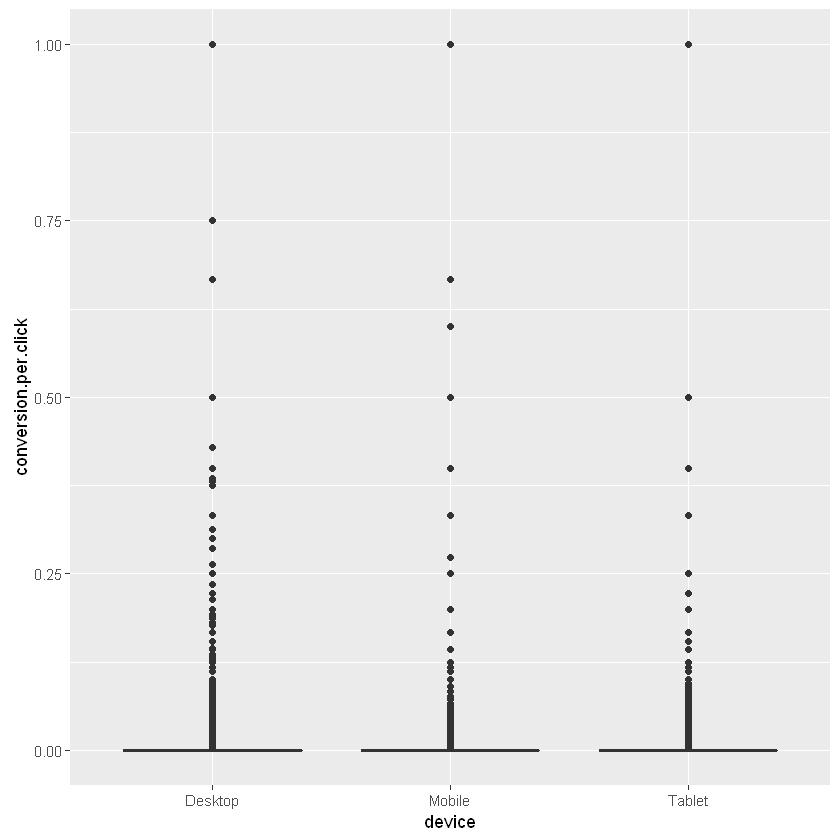

In [212]:
ggplot(mydata, aes(x = device, y = conversion.per.click))+geom_boxplot()

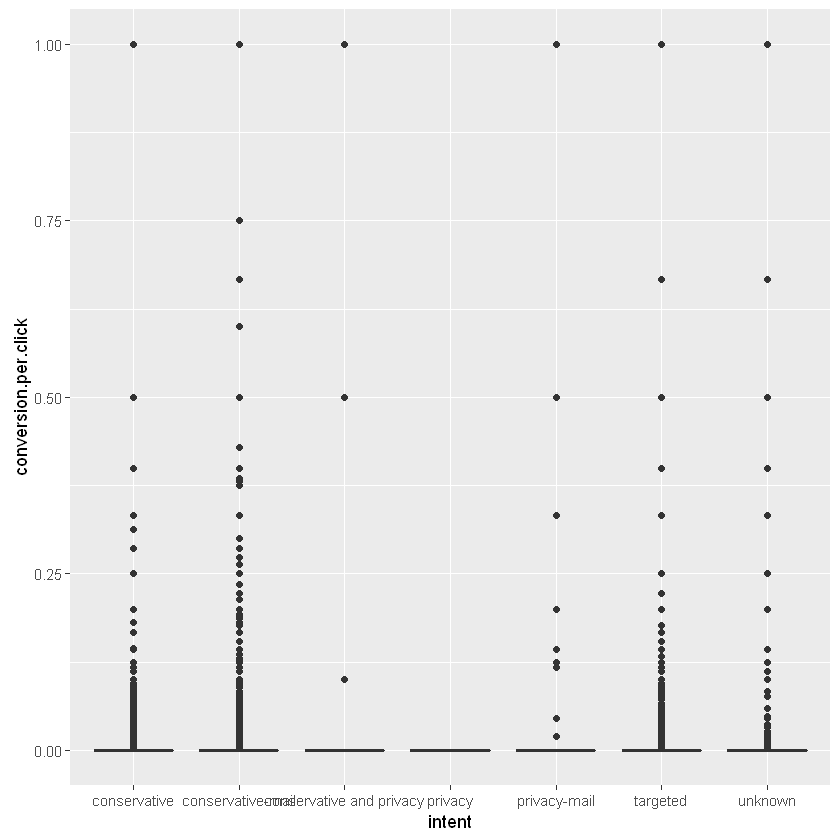

In [89]:
ggplot(mydata, aes(x = intent, y = conversion.per.click)) + geom_boxplot()

In [140]:
#Group the conversion per click my intent and calculate the average
print ("conversion per click of privacy-mail is: ")
mean(mydata[which(mydata[,1]=="privacy-mail"),6])

print ("conversion per click of conservative-mail is: ")
mean(mydata[which(mydata[,1]=="conservative-mail"),6])

print ("conversion per click of conservative is: ")
mean(mydata[which(mydata[,1]=="conservative"),6])

print ("conversion per click of privacy is: ")
mean(mydata[which(mydata[,1]=="privacy"),6])

print ("conversion per click of targeted is: ")
mean(mydata[which(mydata[,1]=="targeted"),6])

print ("conversion per click of unknown is: ")
mean(mydata[which(mydata[,1]=="unknown"),6])

print ("conversion per click of conservative.and.privacy is: ")
mean(mydata[which(mydata[,1]=="conservative and privacy"),6])

[1] "conversion per click of privacy-mail is: "


[1] 0.003092381

[1] "conversion per click of conservative-mail is: "


[1] 0.02510902

[1] "conversion per click of conservative is: "


[1] 0.004611325

[1] "conversion per click of privacy is: "


[1] 0

[1] "conversion per click of targeted is: "


[1] 0.01305981

[1] "conversion per click of unknown is: "


[1] 0.006015596

[1] "conversion per click of conservative.and.privacy is: "


[1] 0.02110092

In [197]:
clist <- c("Desktop", "Tablet","Mobile")
rlist <- c("privacy-mail","conservative-mail","conservative","privacy","targeted","unknown","conservative and privacy")
mean_mat = matrix(ncol = 3, nrow = 7)
median_mat = matrix(ncol = 3, nrow = 7)
c = 0
for (i in clist) 
{
    
    c = c + 1
    r = 0
    for (j in rlist)
    {       
        r = r + 1
        mean_mat[r,c] = mean(mydata[which(mydata[,1] == j & mydata[,2] == i),6])
        median_mat[r,c] = median(mydata[which(mydata[,1] == j & mydata[,2] == i),6])
    }
}

In [191]:
mean_tab <- as.table(mean_mat)
colnames(mean_tab) <- c("Desktop", "Tablet","Mobile")
rownames(mean_tab) <- c("privacy-mail","conservative-mail","conservative","privacy","targeted","unknown","conservative and privacy")
mean_tab

                              Desktop       Tablet       Mobile
privacy-mail             0.0050851572 0.0005431831 0.0016929134
conservative-mail        0.0338409407 0.0218683783 0.0138118797
conservative             0.0073973090 0.0020782664 0.0020323673
privacy                  0.0000000000 0.0000000000 0.0000000000
targeted                 0.0157508319 0.0143446598 0.0086046895
unknown                  0.0093330341 0.0050278135 0.0020313757
conservative and privacy 0.0307017544 0.0000000000 0.0161764706

In [198]:
median_tab <- as.table(median_mat)
colnames(median_tab) <- c("Desktop", "Tablet","Mobile")
rownames(median_tab) <- c("privacy-mail","conservative-mail","conservative","privacy","targeted","unknown","conservative and privacy")
median_tab

                         Desktop Tablet Mobile
privacy-mail                   0      0      0
conservative-mail              0      0      0
conservative                   0      0      0
privacy                        0      0      0
targeted                       0      0      0
unknown                        0      0      0
conservative and privacy       0      0      0